### 경사 소실 (gradient vanishing)
- 그레디언트 값이 매우 작아져 학습이 안되는 현상 0 에 가까워 지면 가중치 업데이트가 안되는 현상

### 데드 렐루 문제
- 특정 뉴런이 영구적으로 활성화되지 않게 되는 현상
- 하지만
    - 미분값이 0이어도 학습에 효과가 있다는 연구 결과(음수값이 없고, 양수 값만 있어도 오히려 학습에 도움이 된다.)

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

# 시스템 폰트패밀리에 따라 변경
plt.rc("font", family = "NanumSquareRound")
plt.rcParams["axes.unicode_minus"] = False

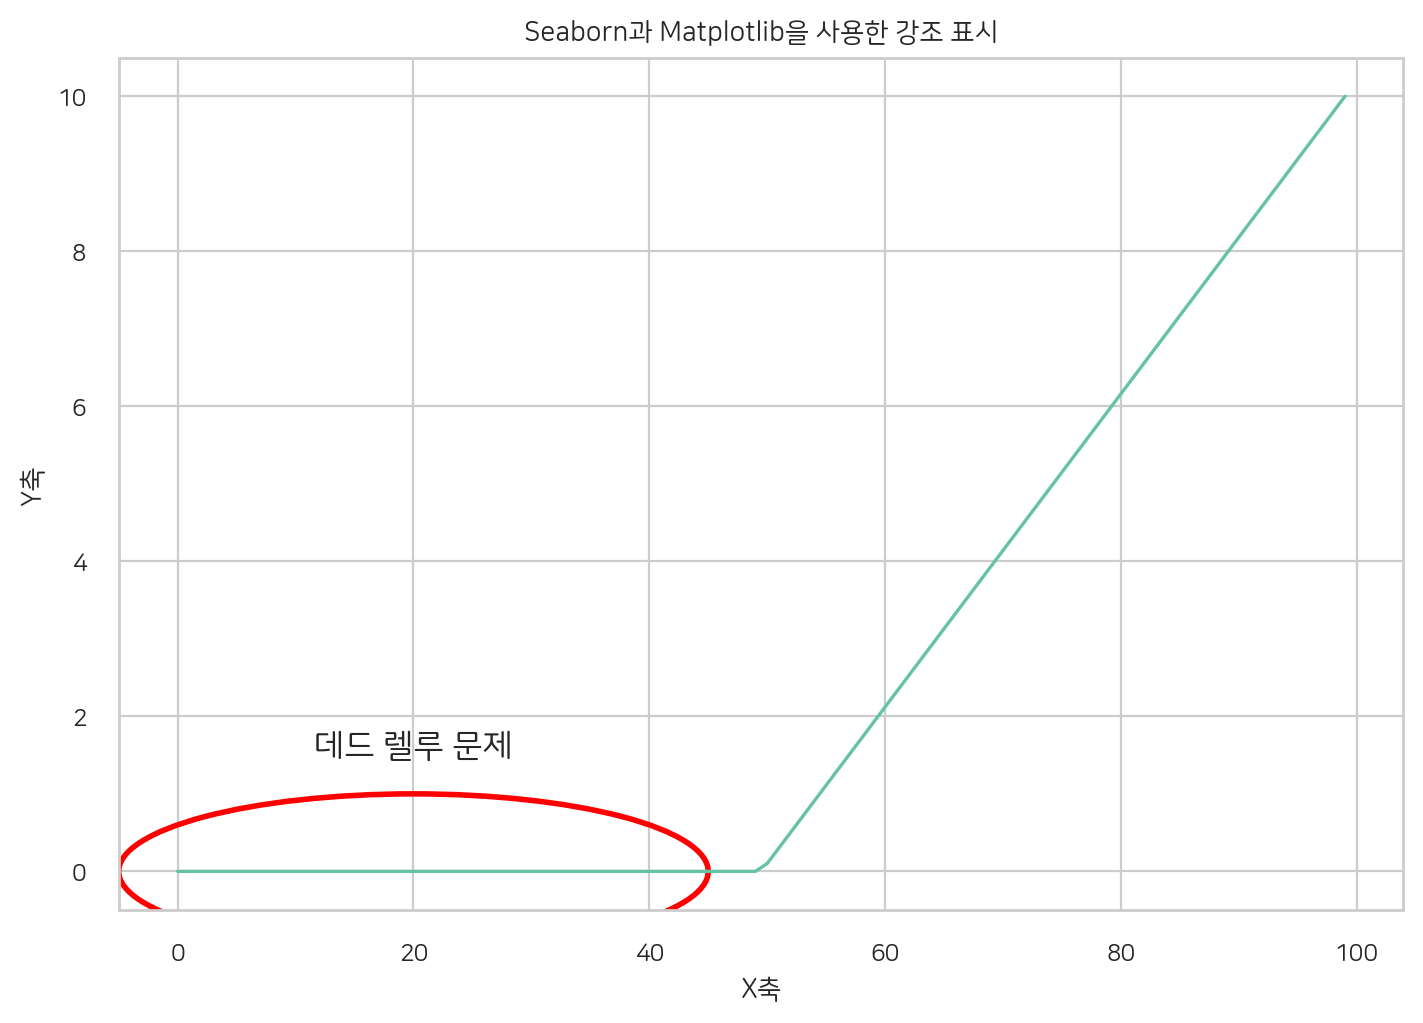

In [51]:
from matplotlib.patches import Ellipse

x = np.linspace(-10, 10, 100)

def relu(x):
    return np.maximum(0, x)

y_relu = relu(x)

def graph(func,name):
    _, ax = plt.subplots(figsize = (7,5))
    sns.lineplot(func, ax=ax)
    ax.set_title(f'{name}')

graph(y_relu,'ReLU')

highlight_x = 20
highlight_y = 1.5
plt.text(highlight_x, highlight_y, '데드 렐루 문제 원인', fontsize=12, ha='center')

ellipse = Ellipse((highlight_x, 0), width=50, height=2, edgecolor='r', facecolor='none', linewidth=2)
plt.gca().add_patch(ellipse)

# 그래프 설정
plt.xlabel('X축')
plt.ylabel('Y축')
plt.title('Seaborn과 Matplotlib을 사용한 강조 표시')


plt.show()

### 과적합 (Overfitting)
- **정의**: 모델이 학습 데이터에 너무 잘 적합되어 새로운 데이터에 대한 성능 저하.
- **문제점**: 훈련 데이터 높은 정확도, 테스트 데이터 성능 저하.
  
### 과적합 해결책

1. **일반화 (Generalization)**
   - **정의**: 모델이 새로운 데이터에 잘 동작하는 능력.
   - **목표**: 훈련 데이터와 테스트 데이터에서 좋은 성능 유지.
   
2. **정규화 (Regularization)** 기법 으로서의 해결책
   - **목적**: 과적합 방지 및 모델 복잡도 조절.
      
   - **가중치 정규화 (Weight Regularization)**
     - **L1 규제 (Lasso)**: 가중치를 0으로 만들어 모델 단순화.
       - **예시**: 중요하지 않은 특성을 제거하여 모델이 더 간결해짐.
     - **L2 규제 (Ridge)**: 가중치 제곱의 합을 패널티로 추가해 복잡도 감소.
       - **예시**: 모든 특성에 작은 가중치를 부여하여 과적합 방지.
      
   - **드롭 아웃 (Dropout)**
     - **정의**: 학습 중 무작위로 노드를 비활성화.
     - **효과**: 노드간 의존성 감소, 다양한 모델 학습.
     - **예시**: 모델이 특정 노드에만 의존하지 않게 함으로써 일반화 성능 향상.
      
   - **조기 종료 (Early Stopping)**
     - **정의**: 성능 개선이 없을 때 학습 조기 종료.
     - **효과**: 최적 가중치 유지, 과적합 방지.
     - **예시**: 과거 성능 개선이 없는 경우, 종료하고 최상의 모델을 선택.
   
3. **데이터 관점 으로서의 해결책**
   
   - **데이터 확장 (Augmentation)**
     - **정의**: 기존 데이터를 변형해 새로운 데이터 생성.
     - **효과**: 데이터 다양화로 일반화 성능 향상.
     - **예시**: 이미지 회전, 확대, 축소 등의 변형을 통해 학습 데이터를 증가시키기.

   - **교차 검증 (Cross-Validation)**
     - **정의**: 데이터를 여러 부분으로 나누어 모델 성능 평가.
     - **방법**: K-폴드 교차 검증 등.
     - **예시**: 데이터를 K개의 그룹으로 나누고, 각 그룹을 테스트 세트로 순차적으로 사용하여 모델 평가.

### 초기 가중치 문제(Weight Initialization Problem)
- 가중치는 신경망의 성능과 학습 시간에 큰 영향을 미치며, 잘못된 초기화는 다양한 문제를 초래할 수 있다.

- 초기 가중치 설정의 중요성
    - **대칭 깨기**: 모든 뉴런의 가중치를 동일하게 초기화하면, 각 뉴런이 같은 출력을 가지게 되어 학습이 이루어지지 않는다. 따라서 가중치는 랜덤하게 초기화하여 뉴런들이 서로 다른 출력을 내도록 해야 한다. 
    - **수렴 속도**: 초기 가중치가 적절하게 설정되지 않으면, 신경망은 비효율적으로 학습하거나 지역 최적점에 빠질 수 있다. 이는 학습이 느려지거나 최적 솔루션에 도달하지 못하게 만든다.
    - **그래디언트 소실 및 폭주**: 초기 가중치의 크기에 따라 그래디언트 소실(vanishing gradient) 또는 그래디언트 폭주(exploding gradient) 문제가 발생할 수 있다. 이는 네트워크의 깊이가 증가함에 따라 심각한 문제가 될 수 있다.

- 일반적인 초기화 기법
    - **제로 초기화**: 모든 가중치를 0으로 설정하는 방법으로, 대칭 문제를 일으켜 각 뉴런이 동일한 출력을 가지게 하므로 일반적으로 사용되지 않는다.
    - **랜덤 초기화**: 가중치를 무작위로 초기화하는 방법이며, 보통 정규분포나 균일분포를 사용한다.
    - **Xavier 초기화**: 입력 노드와 출력 노드의 수에 따라 가중치를 초기화하는 방법으로, 주로 ReLU 활성화 함수와 함께 사용된다.
    - **He 초기화**: ReLU와 그 변형 함수에 적합하게 설계된 초기화 방법으로, Xavier 초기화와 비슷하지만 가중치를 더 크게 초기화한다.

- 권장 사항
    1. **적절한 초기화 선택**: 사용 중인 활성화 함수에 따라 적합한 초기화 방법을 선택해야 한다.
    2. **실험적 접근**: 특정 문제나 데이터셋에 따라 초기화 방법이 달라질 수 있으므로, 여러 초기화 방법을 실험해 보는 것이 좋다.
    3. **정규화 기법 사용**: 배치 정규화(Batch Normalization)와 같은 정규화 기법을 도입하면 초기 가중치 문제를 완화할 수 있다.
